In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

In [274]:
df=pd.read_csv('layoffs_data.csv')
df

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Lyst,London,Retail,50.0,0.25,2022-11-29,https://techcrunch.com/2022/11/29/lyst-the-uk-...,144.0,Unknown,2022-11-30 06:03:36,United Kingdom,Unknown
1,Bitfront,SF Bay Area,Crypto,NaN,1.00,2022-11-29,https://www.reuters.com/technology/crypto-exch...,NaN,Unknown,2022-11-30 05:54:28,United States,Unknown
2,Codexis,SF Bay Area,Healthcare,NaN,0.18,2022-11-29,https://www.codexis.com/investors/news-events/...,162.0,IPO,2022-11-30 06:17:39,United States,Unknown
3,Lazerpay,Lagos,Crypto,NaN,NaN,2022-11-29,https://techpoint.africa/2022/11/29/lazerpay-s...,NaN,Unknown,2022-11-30 05:59:51,Nigeria,Unknown
4,MessageBird,Amsterdam,Other,NaN,0.31,2022-11-29,https://tech.eu/2022/11/29/messagebird-lay-off...,1100.0,Series C,2022-11-30 05:57:28,Netherlands,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1691,Service,Los Angeles,Travel,NaN,1.00,2020-03-16,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,2020-08-31 15:17:26,United States,Unknown
1692,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,Unknown
1693,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,Unknown
1694,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,Unknown


In [13]:
df.columns

Index(['Company', 'Location', 'Industry', 'Laid_Off_Count', 'Percentage',
       'Date', 'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country',
       'List_of_Employees_Laid_Off'],
      dtype='object')

In [14]:
df.nunique()

Company                       1421
Location                       161
Industry                        28
Laid_Off_Count                 229
Percentage                      69
Date                           400
Source                        1525
Funds_Raised                   549
Stage                           15
Date_Added                    1657
Country                         55
List_of_Employees_Laid_Off     128
dtype: int64

In [17]:
df['Industry'].value_counts()

Finance           208
Retail            141
Healthcare        122
Transportation    108
Food              107
Marketing         106
Real Estate        99
Consumer           81
Media              75
Other              74
Education          72
Travel             61
Data               59
Crypto             58
Security           47
HR                 44
Logistics          34
Infrastructure     34
Recruiting         28
Support            25
Fitness            25
Sales              25
Product            24
Construction       13
Energy             10
Legal               7
Aerospace           6
Unknown             3
Name: Industry, dtype: int64

In [25]:
df['Location'].value_counts()

SF Bay Area      452
New York City    193
Boston            74
Los Angeles       72
Seattle           60
                ... 
New Haven          1
Santiago           1
Indianapolis       1
Porto Alegre       1
Tampa Bay          1
Name: Location, Length: 161, dtype: int64

In [51]:
df['Stage'].value_counts()

Unknown           292
Series B          239
Series C          235
IPO               232
Series D          180
Series A          141
Acquired          117
Series E           90
Seed               58
Series F           41
Private Equity     27
Series H           20
Series G           12
Series J            7
Series I            5
Name: Stage, dtype: int64

[Text(0, 0, 'Unknown'),
 Text(1, 0, 'IPO'),
 Text(2, 0, 'Series C'),
 Text(3, 0, 'Series A'),
 Text(4, 0, 'Series D'),
 Text(5, 0, 'Series E'),
 Text(6, 0, 'Series J'),
 Text(7, 0, 'Acquired'),
 Text(8, 0, 'Series B'),
 Text(9, 0, 'Seed'),
 Text(10, 0, 'Series F'),
 Text(11, 0, 'Private Equity'),
 Text(12, 0, 'Series H'),
 Text(13, 0, 'Series G'),
 Text(14, 0, 'Series I')]

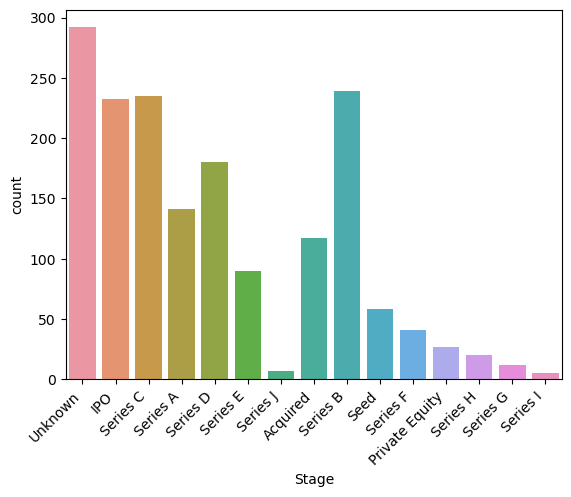

In [275]:
chart= sns.countplot(data=df,x='Stage')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [44]:
df['Laid_Off_Count']

0       50.0
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1691     NaN
1692     8.0
1693     6.0
1694    20.0
1695    75.0
Name: Laid_Off_Count, Length: 1696, dtype: float64

In [45]:
df['Laid_Off_Count'] = df['Laid_Off_Count'].fillna(0)

In [46]:
df['Laid_Off_Count']

0       50.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
1691     0.0
1692     8.0
1693     6.0
1694    20.0
1695    75.0
Name: Laid_Off_Count, Length: 1696, dtype: float64

In [47]:
df['Percentage'] = df['Percentage'].fillna(0)

In [48]:
df['Percentage']

0       0.25
1       1.00
2       0.18
3       0.00
4       0.31
        ... 
1691    1.00
1692    0.10
1693    0.75
1694    0.40
1695    0.00
Name: Percentage, Length: 1696, dtype: float64

In [57]:
df['Funds_Raised'] = df['Funds_Raised'].fillna(0)
df['Funds_Raised']

0        144.0
1          0.0
2        162.0
3          0.0
4       1100.0
         ...  
1691       5.1
1692      45.0
1693       1.0
1694      90.0
1695      12.0
Name: Funds_Raised, Length: 1696, dtype: float64

In [276]:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month_Year'] = df['Date'].dt.to_period('M')
df['Month_Year']

0       2022-11
1       2022-11
2       2022-11
3       2022-11
4       2022-11
         ...   
1691    2020-03
1692    2020-03
1693    2020-03
1694    2020-03
1695    2020-03
Name: Month_Year, Length: 1696, dtype: period[M]

[Text(0, 0, '2022-11'),
 Text(1, 0, '2022-10'),
 Text(2, 0, '2022-09'),
 Text(3, 0, '2022-08'),
 Text(4, 0, '2022-07'),
 Text(5, 0, '2022-06'),
 Text(6, 0, '2022-05'),
 Text(7, 0, '2022-04'),
 Text(8, 0, '2022-03'),
 Text(9, 0, '2022-02'),
 Text(10, 0, '2022-01'),
 Text(11, 0, '2021-12'),
 Text(12, 0, '2021-11'),
 Text(13, 0, '2021-10'),
 Text(14, 0, '2021-09'),
 Text(15, 0, '2021-08'),
 Text(16, 0, '2021-07'),
 Text(17, 0, '2021-06'),
 Text(18, 0, '2021-05'),
 Text(19, 0, '2021-04'),
 Text(20, 0, '2021-03'),
 Text(21, 0, '2021-02'),
 Text(22, 0, '2021-01'),
 Text(23, 0, '2020-12'),
 Text(24, 0, '2020-11'),
 Text(25, 0, '2020-10'),
 Text(26, 0, '2020-09'),
 Text(27, 0, '2020-08'),
 Text(28, 0, '2020-07'),
 Text(29, 0, '2020-06'),
 Text(30, 0, '2020-05'),
 Text(31, 0, '2020-04'),
 Text(32, 0, '2020-03')]

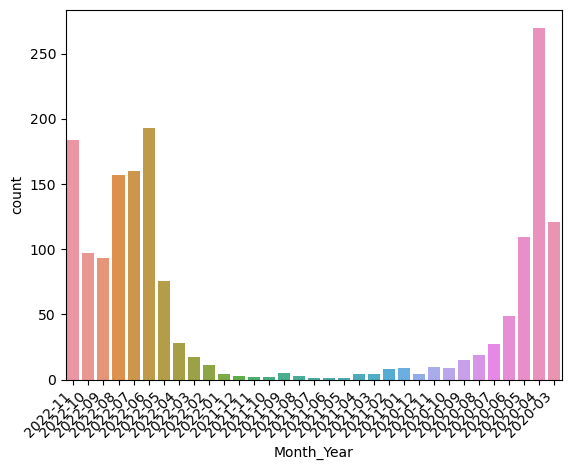

In [280]:
date_check= sns.countplot(data=df,x='Month_Year')
date_check.set_xticklabels(date_check.get_xticklabels(), rotation=45, horizontalalignment='right')


In [78]:
# There was a significant amount of layoffs between the end of the first quarter(march), 
# and the beginning of the second quarter as we reached a peak of layoffs in april of 2020. 
# My assumption was due to the economy shutdown due to covid.
# The layoffs then decreased during year 2021 due to economic boom and availability of jobs.
# Lay offs picked up again due to the decreasing job market at the beginning of the second quarter of 2022.

In [82]:
seriesb_funds =df.loc[df['Stage'].str.contains('Series B')]
seriesb_funds

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off,Month_Year,Month
23,Utopia Music,Zug,Media,0.0,0.00,2022-11-24,https://www.musicbusinessworldwide.com/utopia-...,0.0,Series B,2022-11-25 22:23:39,Switzerland,Unknown,2022-11,2022-11
27,SIRCLO,Jakarta,Retail,160.0,0.08,2022-11-22,https://dailysocial.id/post/sirclo-layoff-2022,92.0,Series B,2022-11-22 17:53:56,Indonesia,Unknown,2022-11,2022-11
29,Flash Coffee,Singapore,Food,0.0,0.00,2022-11-22,https://www.businesstimes.com.sg/startups-tech...,57.0,Series B,2022-11-25 04:12:58,Singapore,Unknown,2022-11,2022-11
46,Chili Piper,New York City,Sales,58.0,0.00,2022-11-17,https://www.linkedin.com/feed/update/urn:li:ac...,54.0,Series B,2022-11-17 21:34:39,United States,https://docs.google.com/spreadsheets/d/1h16hlI...,2022-11,2022-11
48,TealBook,Toronto,Other,34.0,0.19,2022-11-17,https://www-theglobeandmail-com.cdn.ampproject...,73.0,Series B,2022-11-17 17:26:04,Canada,Unknown,2022-11,2022-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,The Guild,Austin,Travel,38.0,0.22,2020-03-23,https://www.americaninno.com/austin/inno-news/...,36.0,Series B,2020-03-28 20:52:49,United States,Unknown,2020-03,2020-03
1670,Triplebyte,SF Bay Area,Recruiting,15.0,0.17,2020-03-23,https://layoffs.fyi/2020/03/26/triplebyte-lays...,48.0,Series B,2020-03-28 20:52:49,United States,Unknown,2020-03,2020-03
1674,Zwift,Los Angeles,Fitness,0.0,0.00,2020-03-23,https://www.dcrainmaker.com/2020/03/zwift-lays...,164.0,Series B,2020-04-02 22:05:25,United States,Unknown,2020-03,2020-03
1676,Peek,Salt Lake City,Travel,45.0,0.00,2020-03-20,https://layoffs.fyi/2020/04/06/peek-conducted-...,39.0,Series B,2020-04-03 14:42:45,United States,Unknown,2020-03,2020-03


In [ ]:
#I want to know why series b companies has 2nd most lay offs and Series I has the least Lay offs.

In [99]:
seriesb_funds.describe()

,Laid_Off_Count,Percentage,Funds_Raised
count,239.000000,239.000000,239.000000
mean,52.552301,0.248410,92.086109
std,92.556980,0.279012,128.897939
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,35.000000
50%,30.000000,0.190000,58.000000
75%,64.000000,0.320000,90.500000
max,1000.000000,1.000000,955.000000


In [283]:
#From the whole data jobs in Finance had the most lay offs, which marks roughly 18% of the total layoffs in Series B Companies
seriesb_funds['Industry'].value_counts()

Finance           43
Healthcare        18
Real Estate       16
Travel            15
Marketing         14
Food              13
Retail            13
Education         12
Media             11
Transportation    11
Other              8
Data               8
Consumer           7
HR                 7
Crypto             7
Logistics          6
Construction       5
Security           4
Support            4
Sales              4
Infrastructure     4
Recruiting         4
Product            3
Legal              1
Fitness            1
Name: Industry, dtype: int64

In [97]:
#Average amount of Money Raised in THOUSANDS.
seriesb_funds['Funds_Raised'].mean()

92.08610878661086

In [98]:
#Total Amount of Money Raised for Series B Companies.(Thousands)
seriesb_funds['Funds_Raised'].sum()

22008.58

In [141]:
seriesb_funds['Laid_Off_Count'].sum()

12560.0

In [137]:
seriesi_funds =df.loc[df['Stage'].str.contains('Series I')]
seriesi_funds

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
1125,Swiggy,Bengaluru,Food,350.0,0.05,2020-07-27,https://www.livemint.com/companies/news/350-sw...,1600.0,Series I,2020-07-28 20:25:53,India,Unknown
1168,Grab,Singapore,Transportation,360.0,0.05,2020-06-16,https://layoffs.fyi/2020/06/24/official-grab-l...,9900.0,Series I,2020-06-16 13:43:48,Singapore,Unknown
1226,Swiggy,Bengaluru,Food,1100.0,0.14,2020-05-18,https://www.nytimes.com/reuters/2020/05/18/tec...,1600.0,Series I,2020-05-18 14:15:14,India,Unknown
1358,Swiggy,Bengaluru,Food,800.0,NaN,2020-04-21,https://entrackr.com/2020/04/exclusive-swiggy-...,1600.0,Series I,2020-04-22 04:14:08,India,Unknown
1386,Sweetgreen,Los Angeles,Food,35.0,0.10,2020-04-17,https://dot.la/sweetgreen-layoffs-2645746821.html,478.0,Series I,2020-04-17 23:26:12,United States,Unknown


In [ ]:
#Looking at the DataFrame of Series I has the least amount of Companies. Which simply answers our question on why they had the least amount of lay offs.

In [139]:
#Has the lowest average of Funds raised which is 3k
seriesi_funds['Funds_Raised'].mean()

3035.6

In [142]:
seriesi_funds['Funds_Raised'].sum()

15178.0

In [143]:
seriesi_funds['Laid_Off_Count'].sum()

2645.0

In [144]:
unknown_companies = df.loc[df['Stage']== 'Unknown']
unknown_companies

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Lyst,London,Retail,50.0,0.25,2022-11-29,https://techcrunch.com/2022/11/29/lyst-the-uk-...,144.0,Unknown,2022-11-30 06:03:36,United Kingdom,Unknown
1,Bitfront,SF Bay Area,Crypto,NaN,1.00,2022-11-29,https://www.reuters.com/technology/crypto-exch...,NaN,Unknown,2022-11-30 05:54:28,United States,Unknown
3,Lazerpay,Lagos,Crypto,NaN,NaN,2022-11-29,https://techpoint.africa/2022/11/29/lazerpay-s...,NaN,Unknown,2022-11-30 05:59:51,Nigeria,Unknown
7,Wildlife Studios,Sao Paulo,Consumer,300.0,0.20,2022-11-28,https://mobilegamer.biz/massive-layoffs-at-wil...,260.0,Unknown,2022-11-29 15:59:03,Brazil,https://docs.google.com/spreadsheets/u/1/d/10J...
10,Ajaib,Jakarta,Finance,67.0,0.08,2022-11-28,https://www.techinasia.com/indonesian-investme...,245.0,Unknown,2022-11-30 06:12:35,Indonesia,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1662,Peerfit,Tampa Bay,HR,NaN,0.40,2020-03-24,https://www.americaninno.com/tampabay/newslett...,47.0,Unknown,2020-03-30 13:59:33,United States,Unknown
1669,GrayMeta,Los Angeles,Data,20.0,0.40,2020-03-23,LinkedIn,7.0,Unknown,2020-04-01 05:31:34,United States,Unknown
1682,Ejento,SF Bay Area,Recruiting,84.0,1.00,2020-03-19,https://layoffs.fyi/list/ejento/,NaN,Unknown,2020-03-28 20:52:49,United States,Unknown
1686,Popin,New York City,Fitness,NaN,1.00,2020-03-19,https://www.businessinsider.com/fitness-app-po...,13.0,Unknown,2020-04-06 23:47:12,United States,Unknown


In [145]:
unknown_companies.describe()

,Laid_Off_Count,Percentage,Funds_Raised
count,194.000000,188.000000,221.000000
mean,170.149485,0.317766,523.201810
std,390.625224,0.305884,1210.743792
min,5.000000,0.020000,1.000000
25%,30.000000,0.117500,36.000000
50%,60.000000,0.200000,156.000000
75%,118.750000,0.370000,423.000000
max,3000.000000,1.000000,9400.000000


In [192]:
df['Percentage'] = df['Percentage'].fillna(0)
df['Laid_Off_Count'] = df['Laid_Off_Count'].fillna(0)

In [221]:
us_layoff = df.loc[df['Country']=='United States'].reset_index()
us_layoff

,index,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,1,Bitfront,SF Bay Area,Crypto,0.0,1.00,2022-11-29,https://www.reuters.com/technology/crypto-exch...,NaN,Unknown,2022-11-30 05:54:28,United States,Unknown
1,2,Codexis,SF Bay Area,Healthcare,0.0,0.18,2022-11-29,https://www.codexis.com/investors/news-events/...,162.0,IPO,2022-11-30 06:17:39,United States,Unknown
2,11,Candy Digital,New York City,Crypto,33.0,0.33,2022-11-28,https://decrypt.co/115811/gary-vee-sports-nft-...,100.0,Series A,2022-11-29 04:24:38,United States,Unknown
3,13,BlockFi,New York City,Crypto,0.0,1.00,2022-11-28,https://decrypt.co/115744/crypto-lender-blockf...,1000.0,Series E,2022-11-30 06:05:58,United States,Unknown
4,15,Inspectify,Seattle,Real Estate,0.0,0.00,2022-11-28,https://www.bizjournals.com/seattle/news/2022/...,11.0,Series A,2022-11-30 06:10:07,United States,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,1691,Service,Los Angeles,Travel,0.0,1.00,2020-03-16,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,2020-08-31 15:17:26,United States,Unknown
1115,1692,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,Unknown
1116,1693,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,Unknown
1117,1694,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,Unknown


In [211]:
#Total percentage of US layoff based on the data compared to other parts of the world
us_total_layoff = 1119/1696 *100
us_total_layoff

65.97877358490565

In [248]:
city_layoff=us_layoff['Location'].value_counts()
city_layoff

SF Bay Area      451
New York City    193
Boston            74
Los Angeles       72
Seattle           60
                ... 
Nashua             1
Huntsville         1
Copenhagen         1
Stockholm          1
Tampa Bay          1
Name: Location, Length: 75, dtype: int64

In [257]:
#Top 10 cities with the most layoffs in the United States.
view_city = city_layoff.head(10)
view_city

SF Bay Area       451
New York City     193
Boston             74
Los Angeles        72
Seattle            60
Chicago            31
Austin             28
Salt Lake City     18
Portland           16
Atlanta            14
Name: Location, dtype: int64

In [261]:
sf_area=df.loc[df['Location'].str.contains('^SF[a-z]*', flags=re.I, regex=True)]
sf_area

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
1,Bitfront,SF Bay Area,Crypto,0.0,1.00,2022-11-29,https://www.reuters.com/technology/crypto-exch...,NaN,Unknown,2022-11-30 05:54:28,United States,Unknown
2,Codexis,SF Bay Area,Healthcare,0.0,0.18,2022-11-29,https://www.codexis.com/investors/news-events/...,162.0,IPO,2022-11-30 06:17:39,United States,Unknown
30,Natera,SF Bay Area,Healthcare,0.0,0.00,2022-11-22,https://www.bizjournals.com/sanjose/news/2022/...,809.0,IPO,2022-11-29 04:18:55,United States,Unknown
36,Nuro,SF Bay Area,Transportation,300.0,0.20,2022-11-18,https://techcrunch.com/2022/11/18/autonomous-d...,2100.0,Series D,2022-11-18 21:35:34,United States,https://docs.google.com/spreadsheets/d/1hZo__w...
37,Synthego,SF Bay Area,Healthcare,105.0,0.20,2022-11-18,https://www.fiercebiotech.com/biotech/fierce-b...,459.0,Series E,2022-11-29 04:18:07,United States,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1670,Triplebyte,SF Bay Area,Recruiting,15.0,0.17,2020-03-23,https://layoffs.fyi/2020/03/26/triplebyte-lays...,48.0,Series B,2020-03-28 20:52:49,United States,Unknown
1671,Ladder Life,SF Bay Area,Finance,13.0,0.25,2020-03-23,LinkedIn,94.0,Series C,2020-04-07 13:49:37,United States,Unknown
1672,Cabin,SF Bay Area,Travel,0.0,0.20,2020-03-23,https://www.theinformation.com/articles/layoff...,3.0,Seed,2020-03-28 20:52:49,United States,Unknown
1682,Ejento,SF Bay Area,Recruiting,84.0,1.00,2020-03-19,https://layoffs.fyi/list/ejento/,NaN,Unknown,2020-03-28 20:52:49,United States,Unknown


In [264]:
sf_area['Industry'].value_counts()

Finance           55
Healthcare        37
Transportation    33
Consumer          31
Real Estate       28
Retail            26
Media             25
Other             23
Data              22
Education         21
Marketing         20
HR                19
Food              17
Infrastructure    13
Recruiting        11
Travel            10
Crypto            10
Product           10
Sales              9
Support            8
Logistics          5
Security           5
Aerospace          4
Construction       4
Fitness            2
Energy             2
Unknown            1
Legal              1
Name: Industry, dtype: int64

In [265]:
#When looking for a job in the Bay Area, you want to be careful working for a company that just IPO'ed, 
#Because your chances of getting laid off is higher than that of say Series B or unknown
sf_area['Stage'].value_counts()

IPO               82
Series C          82
Series D          64
Series B          59
Unknown           48
Series E          30
Series A          29
Acquired          27
Seed              11
Series F           8
Series H           7
Private Equity     3
Series G           2
Name: Stage, dtype: int64